**Time Series**

**In the attached data set titled “part_2_timeseries.csv”, the quantity shipped represents customer demand by day for one specific item. Using any method, give a rough prediction for the next 7 day period and include any model validation steps. Discuss the caveats on your approach and what alternative approaches you would use if you had more time.**

To approach this problem I am going to forecast demand for next 7 days in Python 3 using Python Prophet modelling. If I had more time, I would have leverage the ARIMA method to product forecasts from the given time series data. 

Predicted values for next 7 days are:

2015-06-07	641.679435	
2015-06-08	590.787024	
2015-06-09	612.767494	
2015-06-10	528.202595	
2015-06-11	582.258153	
2015-06-12	491.230732	
2015-06-13	499.495650	
2015-06-14	674.414149	

I also wanted to include the error rate in predicted values from actual and preodicted value difference so as to give more accurate prediction. Below you can find th methodology of how I worked around it. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving part_2_timeseries.csv to part_2_timeseries.csv


In [ ]:
import io
import pandas as pd

%matplotlib inline
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_csv(io.BytesIO(uploaded['part_2_timeseries.csv']))
df.head()

,invoice_date,net_weight
0,3/5/15,131
1,3/6/15,164
2,3/7/15,187
3,3/8/15,235
4,3/9/15,213


Prophet library expects as input a Dataframe with one column containing the time information, and another column containing the metric that we wish to forecast. Importantly, the time column is expected to be of the datetime type, so let’s check the type of our columns:

In [ ]:
df.dtypes

invoice_date    object
net_weight       int64
dtype: object

Because the invoice_date column is not of the datetime type, we’ll need to convert it:



In [ ]:
df['invoice_date'] = pd.DatetimeIndex(df['invoice_date'])
df.dtypes

invoice_date    datetime64[ns]
net_weight               int64
dtype: object

We now see that our invoice_date column is of the correct datetime type.

Prophet also imposes the strict condition that the input columns be named ds (the time column) and y (the metric column), so let’s rename the columns in our DataFrame:

In [ ]:
df = df.rename(columns={'invoice_date': 'ds',
                        'net_weight': 'y'})

df.head(5)

,ds,y
0,2015-03-05,131
1,2015-03-06,164
2,2015-03-07,187
3,2015-03-08,235
4,2015-03-09,213


Visualizing our data:

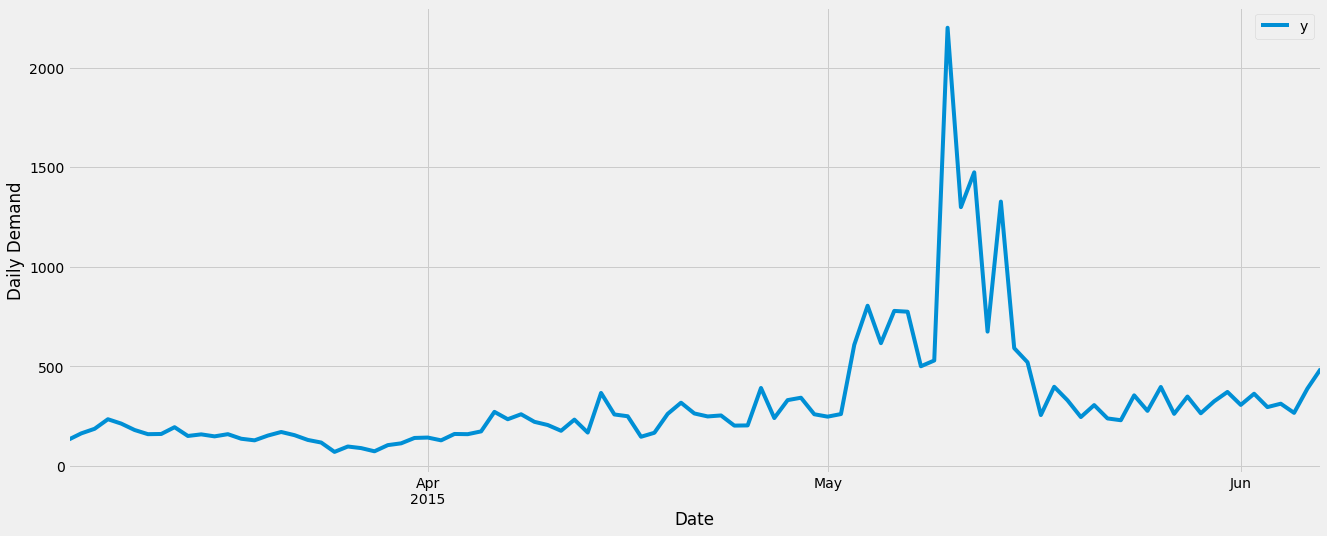

In [ ]:
ax = df.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('Daily Demand')
ax.set_xlabel('Date')

plt.show()

Doing forecasting now:

In [ ]:
# setting the confidence interval to 95% (for Prophet the default value is 80%)
my_model = Prophet(interval_width=0.95)


In [ ]:
my_model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Instructing Prophet to generate 7 datestamps in the future.

In [ ]:
future_dates = my_model.make_future_dataframe(periods = 7)

future_dates.tail()

,ds
97,2015-06-10
98,2015-06-11
99,2015-06-12
100,2015-06-13
101,2015-06-14


The DataFrame of future dates is then used as input to the predict method of our fitted model.



In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)

,ds,yhat,yhat_lower,yhat_upper
94,2015-06-07,641.679435,95.806653,1163.871713
95,2015-06-08,590.787024,2.343743,1118.311604
96,2015-06-09,612.767494,77.336635,1138.190208
97,2015-06-10,528.202595,-12.152357,1035.787686
98,2015-06-11,582.258153,54.574222,1138.628584
99,2015-06-12,491.230732,-57.513842,1020.366317
100,2015-06-13,499.495650,-50.995565,1072.805917
101,2015-06-14,674.414149,126.595036,1172.864084


Subsetting our output to the columns most relevant to forecasting, which are:

**ds: **the datestamp of the forecasted value

**yhat: **the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)

**yhat_lower: **the lower bound of our forecasts

**yhat_upper: **the upper bound of our forecasts

Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

Plotting the results of our forecasts:

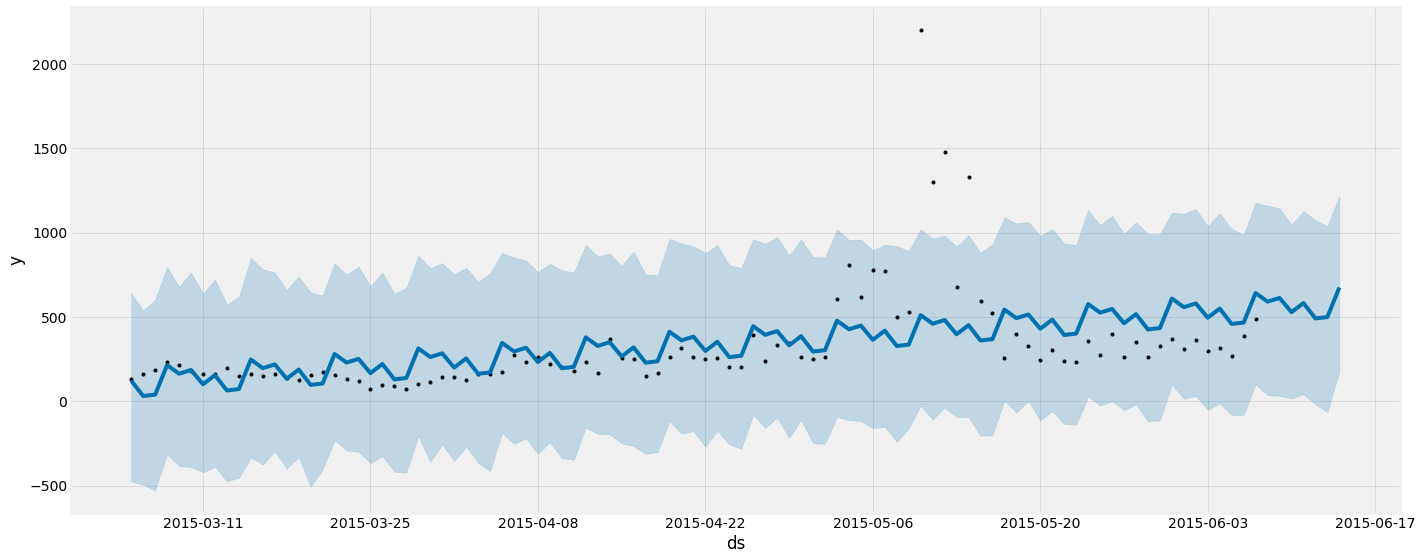

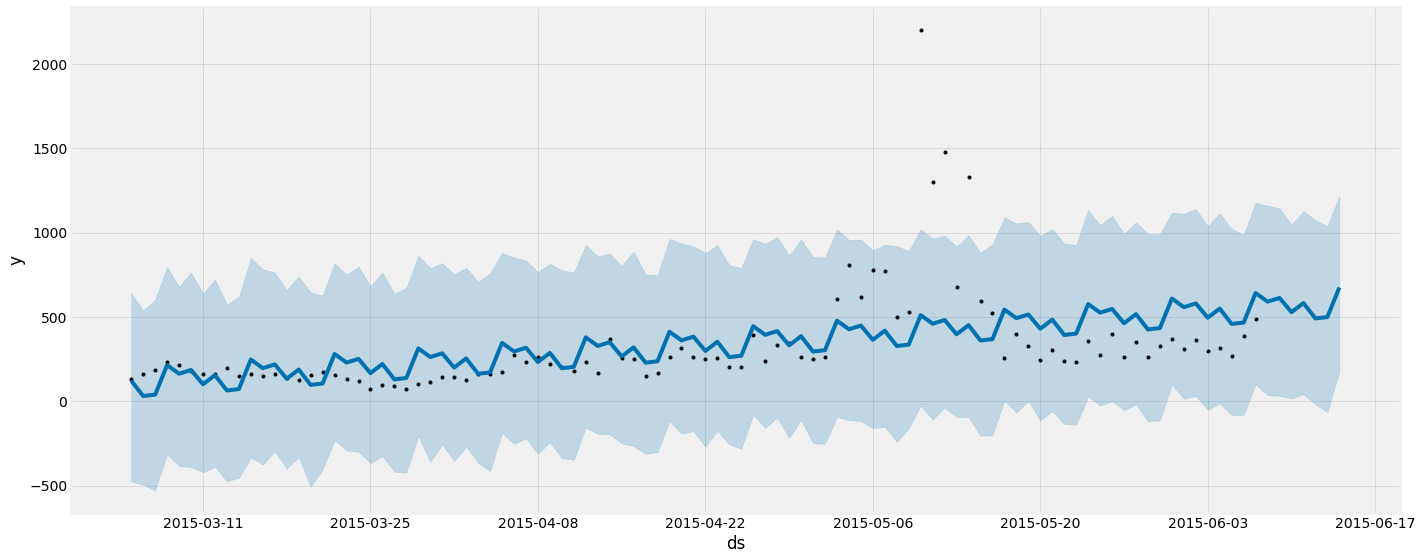

In [ ]:
my_model.plot(forecast,
              uncertainty=True, figsize=(20, 8))

Revealing how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values

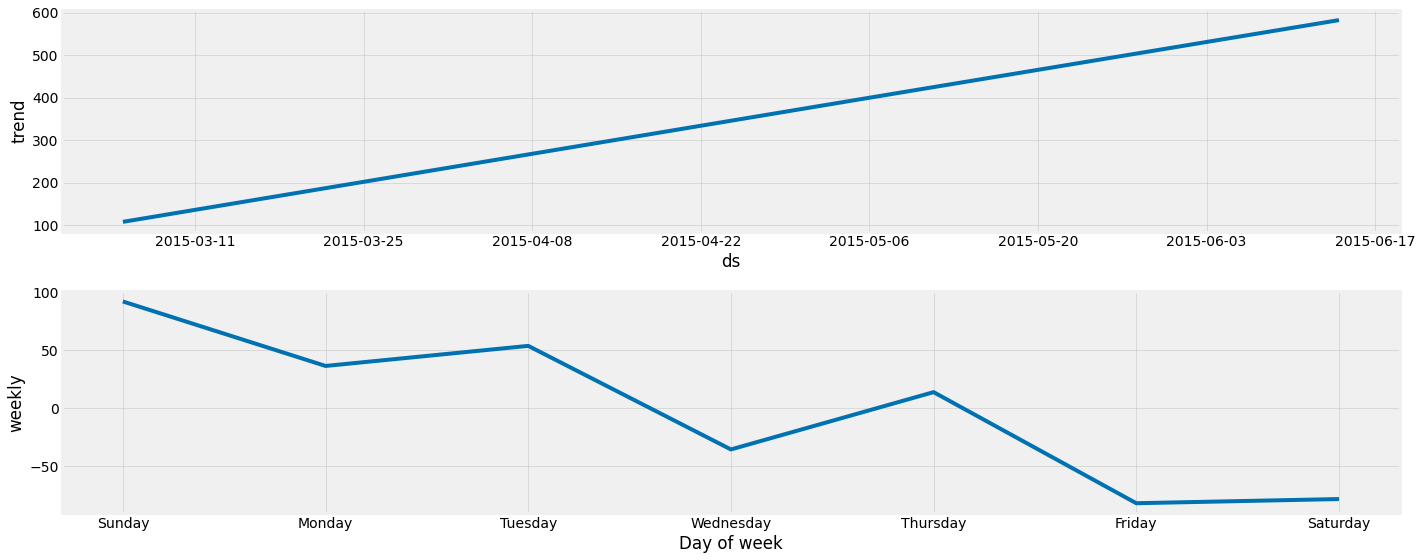

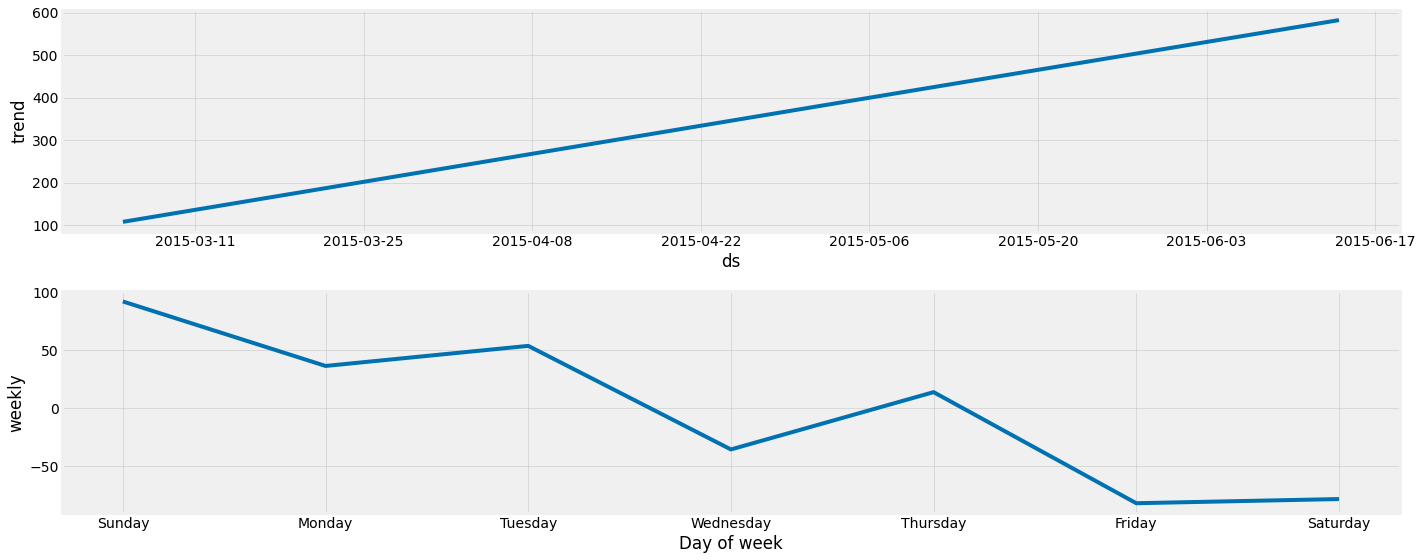

In [ ]:
my_model.plot_components(forecast, figsize=(20, 8))
